<a href="https://colab.research.google.com/github/sebabecerra/CursoBasicoPython/blob/main/05_Librerias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

## Visión General

### Notas
* Una biblioteca es una colección de paquetes o módulos que se agrupan para extender la funcionalidad.
* Tipos:
  1. Bibliotecas estándar (incluidas con Python)
  2. Bibliotecas y paquetes de terceros (necesitan ser instalados)
* Normalmente se instalan usando gestores de paquetes como pip o conda.

### ¿Qué son entonces los Paquetes?
- Un paquete puede incluir módulos y subpaquetes.

### Paquetes vs Bibliotecas
- Python usa paquetes para organizar dentro de sus bibliotecas, y bibliotecas para proporcionar y extender funcionalidades.
- Aunque **todas las bibliotecas pueden considerarse paquetes** (si están estructuradas de esa manera), **no todos los paquetes son bibliotecas**.

### Importancia
* Ayuda a ahorrar tiempo, estandarizar procesos y agregar funcionalidades complejas fácilmente.
* Se usan para cosas como análisis de datos, aprendizaje automático, desarrollo web, automatización y más.



## Bibliotecas Estándar de Python

### Notas

* Al igual que con los módulos, usamos las palabras clave `from` e `import`.
    * `import` obtiene los módulos del módulo.
    * `from` se usa para obtener atributos específicos de un módulo directamente.
* Cuándo usar uno u otro:
    * `import module_name`: Cuando necesitas acceder a varias funciones o atributos de un módulo.
    * `from module_name import attribute_name`: Usa esto cuando solo necesitas una función o atributo específico de un módulo.


### Importancia de las Bibliotecas

### Notas

¿Qué pasa si queremos manipular archivos? Podemos usar la biblioteca estándar en Python para abrir, leer, escribir y cerrar archivos.

Funciones:
- `open`: Abre un archivo. El modo 'r' es para leer, 'w' para escribir (sobrescribe el contenido), 'a' para agregar, y 'b' para modo binario.
- `read`: Lee el contenido de un archivo abierto. También se puede usar `readline()` para una sola línea o `readlines()` para todas las líneas como una lista.
- `write`: Escribe una cadena en un archivo abierto. Si el archivo está abierto en modo agregar ('a'), el texto se añade al final.
- `close`: Cierra un archivo abierto, lo cual es importante para liberar recursos del sistema.

### Ejemplos

**Nota: Este ejemplo está pensado para hacerse en Google Colab con acceso a la carpeta `sample_data`**.

Para leer el contenido de `california_housing_test.csv` e imprimirlo:


In [ ]:
# Abrir el archivo en modo lectura con el códec de decodificación correcto
file_path = r"\\belloto\SVS\DCFP\Bases de Datos\cambios_netos_patrimonio\outputs\flujos\ifrs_fi_201103_202403.csv"
file = open(file_path, 'r', encoding='latin1')  # Puedes cambiar 'latin1' a otro códec si es necesario

# Leer el archivo
content = file.read()

# Cerrar el archivo
file.close()

# Imprimir el contenido
print(content)



Ahora, ¿qué pasa si queremos obtener estos datos en algo utilizable (como un diccionario) para realmente comenzar a realizar análisis de datos:

In [ ]:
import csv

# Abrir el archivo en modo lectura con el códec de decodificación correcto
file_path = r"\\belloto\SVS\DCFP\Bases de Datos\cambios_netos_patrimonio\outputs\flujos\ifrs_fi_201103_202403.csv"
with open(file_path, 'r', encoding='latin1') as file:
    content = file.read()

# Procesar el contenido del archivo CSV
data_dict = {}
csv_reader = csv.reader(content.strip().split('\n'))

# Obtener el encabezado
header = next(csv_reader)
for column in header:
    data_dict[column] = []

# Añadir los datos al diccionario
for row in csv_reader:
    # Asegurarse de que la longitud de la fila coincida con la del encabezado
    if len(row) == len(header):
        for col_index, value in enumerate(row):
            data_dict[header[col_index]].append(value)

# Imprimir el diccionario para verificar el contenido
print(data_dict)



{'periodo;run;nombre;agf;clasificacion;cuenta;valor_sin_tc;moneda;tipo_cambio;valor_pesos;flujo;dolar;flujo_mmusd': []}


Está bien, honestamente es mucho trabajo cada vez que queremos trabajar con archivos CSV. Pero podríamos usar una biblioteca de terceros llamada `pandas` para cargar archivos de manera mucho más fácil.

## Bibliotecas de Terceros

### Ejemplo con Pandas

Con una biblioteca como `pandas`, ¡puedes leer el archivo y convertirlo en 3 líneas de código!

In [ ]:
import pandas as pd

# Crear un DataFrame desde el archivo CSV
file_path = r"\\belloto\SVS\DCFP\Bases de Datos\cambios_netos_patrimonio\outputs\flujos\ifrs_fi_201103_202403.csv"
df = pd.read_csv(file_path, encoding='latin1', sep=';')

# Imprimir el DataFrame
print(df)



           periodo    run                                             nombre  \
0       03/01/2011   7001                          TOESCA FONDO DE INVERSIîN   
1       06/01/2011   7001                          TOESCA FONDO DE INVERSIîN   
2       09/01/2011   7001                          TOESCA FONDO DE INVERSIîN   
3       12/01/2011   7001                          TOESCA FONDO DE INVERSIîN   
4       03/01/2012   7001                          TOESCA FONDO DE INVERSIîN   
...            ...    ...                                                ...   
194908  03/01/2024  10596  CI ENERGY TRANSITION FUND I CHILE FONDO DE INV...   
194909  03/01/2024  10596  CI ENERGY TRANSITION FUND I CHILE FONDO DE INV...   
194910  03/01/2024  10596  CI ENERGY TRANSITION FUND I CHILE FONDO DE INV...   
194911  03/01/2024  10596  CI ENERGY TRANSITION FUND I CHILE FONDO DE INV...   
194912  03/01/2024  10596  CI ENERGY TRANSITION FUND I CHILE FONDO DE INV...   

             agf              clasifica

In [ ]:
df.head()

,periodo,run,nombre,agf,clasificacion,cuenta,valor_sin_tc,moneda,tipo_cambio,valor_pesos,flujo,dolar,flujo_mmusd
0,03/01/2011,7001,TOESCA FONDO DE INVERSIîN,TOESCA,Inmobiliario,AportesTotal,0,$$,1,0,0,"481,4216667",0
1,06/01/2011,7001,TOESCA FONDO DE INVERSIîN,TOESCA,Inmobiliario,AportesTotal,0,$$,1,0,0,"469,2054945",0
2,09/01/2011,7001,TOESCA FONDO DE INVERSIîN,TOESCA,Inmobiliario,AportesTotal,0,$$,1,0,0,"471,3361957",0
3,12/01/2011,7001,TOESCA FONDO DE INVERSIîN,TOESCA,Inmobiliario,AportesTotal,0,$$,1,0,0,"511,3053261",0
4,03/01/2012,7001,TOESCA FONDO DE INVERSIîN,TOESCA,Inmobiliario,AportesTotal,0,$$,1,0,0,"488,8801099",0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame desde el archivo CSV
file_path = r"\\belloto\SVS\DCFP\Bases de Datos\cambios_netos_patrimonio\outputs\flujos\ifrs_fi_201103_202403.csv"
df = pd.read_csv(file_path, encoding='latin1', sep=';')



In [ ]:
# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())
df.head()



Primeras filas del DataFrame:
      periodo   run                     nombre     agf clasificacion  \
0  03/01/2011  7001  TOESCA FONDO DE INVERSIîN  TOESCA  Inmobiliario   
1  06/01/2011  7001  TOESCA FONDO DE INVERSIîN  TOESCA  Inmobiliario   
2  09/01/2011  7001  TOESCA FONDO DE INVERSIîN  TOESCA  Inmobiliario   
3  12/01/2011  7001  TOESCA FONDO DE INVERSIîN  TOESCA  Inmobiliario   
4  03/01/2012  7001  TOESCA FONDO DE INVERSIîN  TOESCA  Inmobiliario   

         cuenta  valor_sin_tc moneda tipo_cambio valor_pesos flujo  \
0  AportesTotal             0     $$           1           0     0   
1  AportesTotal             0     $$           1           0     0   
2  AportesTotal             0     $$           1           0     0   
3  AportesTotal             0     $$           1           0     0   
4  AportesTotal             0     $$           1           0     0   

         dolar flujo_mmusd  
0  481,4216667           0  
1  469,2054945           0  
2  471,3361957           0  


,periodo,run,nombre,agf,clasificacion,cuenta,valor_sin_tc,moneda,tipo_cambio,valor_pesos,flujo,dolar,flujo_mmusd
0,03/01/2011,7001,TOESCA FONDO DE INVERSIîN,TOESCA,Inmobiliario,AportesTotal,0,$$,1,0,0,"481,4216667",0
1,06/01/2011,7001,TOESCA FONDO DE INVERSIîN,TOESCA,Inmobiliario,AportesTotal,0,$$,1,0,0,"469,2054945",0
2,09/01/2011,7001,TOESCA FONDO DE INVERSIîN,TOESCA,Inmobiliario,AportesTotal,0,$$,1,0,0,"471,3361957",0
3,12/01/2011,7001,TOESCA FONDO DE INVERSIîN,TOESCA,Inmobiliario,AportesTotal,0,$$,1,0,0,"511,3053261",0
4,03/01/2012,7001,TOESCA FONDO DE INVERSIîN,TOESCA,Inmobiliario,AportesTotal,0,$$,1,0,0,"488,8801099",0


In [ ]:
# Estadísticas descriptivas del DataFrame
print("\nEstadísticas descriptivas:")
print(df.describe())



Estadísticas descriptivas:
                 run  valor_sin_tc
count  194913.000000  1.949130e+05
mean     9010.329239  6.589713e+06
std      1061.002450  3.599416e+07
min      7001.000000 -4.002582e+08
25%      9085.000000  0.000000e+00
50%      9375.000000  0.000000e+00
75%      9709.000000  4.985200e+04
max     10596.000000  1.106047e+09


In [ ]:
# Seleccionar columnas específicas
selected_columns = df[['nombre', 'agf', 'dolar']]  # Reemplaza con nombres de columnas reales
print("\nColumnas seleccionadas:")
print(selected_columns.head())




Columnas seleccionadas:
                      nombre     agf        dolar
0  TOESCA FONDO DE INVERSIîN  TOESCA  481,4216667
1  TOESCA FONDO DE INVERSIîN  TOESCA  469,2054945
2  TOESCA FONDO DE INVERSIîN  TOESCA  471,3361957
3  TOESCA FONDO DE INVERSIîN  TOESCA  511,3053261
4  TOESCA FONDO DE INVERSIîN  TOESCA  488,8801099


In [ ]:
# Filtrar filas basadas en una condición
filtered_df = df[df['agf'] == "TOESCA"]  # Reemplaza con una condición real
print("\nFiltrado de filas donde 'agf' == TOESCA:")
#print(filtered_df.head())
filtered_df.head


Filtrado de filas donde 'agf' == TOESCA:


<bound method NDFrame.head of            periodo    run                              nombre     agf  \
0       03/01/2011   7001           TOESCA FONDO DE INVERSIîN  TOESCA   
1       06/01/2011   7001           TOESCA FONDO DE INVERSIîN  TOESCA   
2       09/01/2011   7001           TOESCA FONDO DE INVERSIîN  TOESCA   
3       12/01/2011   7001           TOESCA FONDO DE INVERSIîN  TOESCA   
4       03/01/2012   7001           TOESCA FONDO DE INVERSIîN  TOESCA   
...            ...    ...                                 ...     ...   
194698  03/01/2024  10550  TOESCA ABSOLUTO FONDO DE INVERSIîN  TOESCA   
194699  12/01/2023  10550  TOESCA ABSOLUTO FONDO DE INVERSIîN  TOESCA   
194700  03/01/2024  10550  TOESCA ABSOLUTO FONDO DE INVERSIîN  TOESCA   
194701  12/01/2023  10550  TOESCA ABSOLUTO FONDO DE INVERSIîN  TOESCA   
194702  03/01/2024  10550  TOESCA ABSOLUTO FONDO DE INVERSIîN  TOESCA   

             clasificacion         cuenta  valor_sin_tc moneda tipo_cambio  \
0             I

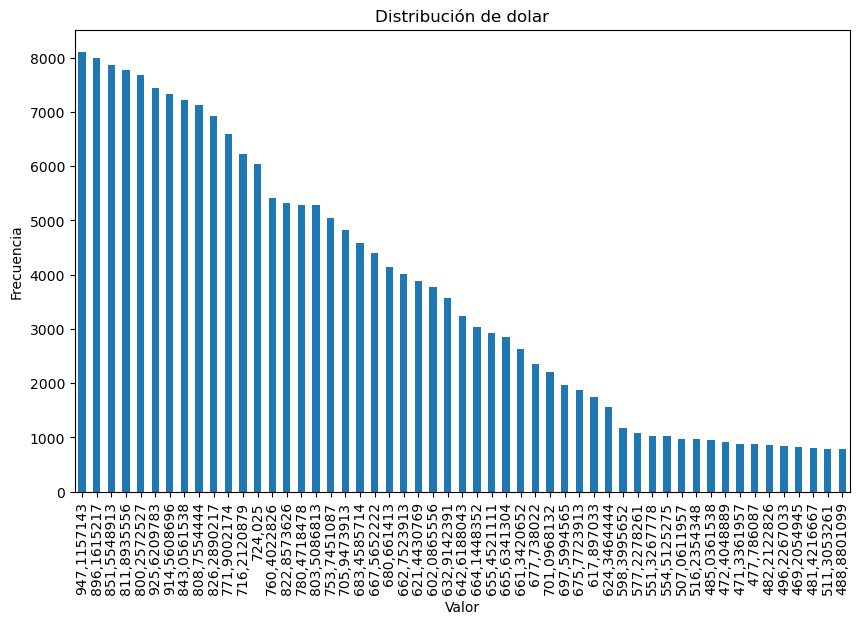

In [ ]:
# Crear un gráfico de barras para una columna específica
plt.figure(figsize=(10, 6))
df['dolar'].value_counts().plot(kind='bar')
plt.title('Distribución de dolar')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df

,periodo,run,nombre,agf,clasificacion,cuenta,valor_sin_tc,moneda,tipo_cambio,valor_pesos,flujo,dolar,flujo_mmusd
0,03/01/2011,7001,TOESCA FONDO DE INVERSIîN,TOESCA,Inmobiliario,AportesTotal,0,$$,1,0,0,"481,4216667",0
1,06/01/2011,7001,TOESCA FONDO DE INVERSIîN,TOESCA,Inmobiliario,AportesTotal,0,$$,1,0,0,"469,2054945",0
2,09/01/2011,7001,TOESCA FONDO DE INVERSIîN,TOESCA,Inmobiliario,AportesTotal,0,$$,1,0,0,"471,3361957",0
3,12/01/2011,7001,TOESCA FONDO DE INVERSIîN,TOESCA,Inmobiliario,AportesTotal,0,$$,1,0,0,"511,3053261",0
4,03/01/2012,7001,TOESCA FONDO DE INVERSIîN,TOESCA,Inmobiliario,AportesTotal,0,$$,1,0,0,"488,8801099",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194908,03/01/2024,10596,CI ENERGY TRANSITION FUND I CHILE FONDO DE INV...,SECURITY,Infraestructura y Energa,RepartosDePatrimonioTotal,0,PROM,"947,1157143",0,0,"947,1157143",0
194909,03/01/2024,10596,CI ENERGY TRANSITION FUND I CHILE FONDO DE INV...,SECURITY,Infraestructura y Energa,ResultadoDelEjercicioTotal,-3,PROM,"947,1157143","-2841,347143","-2841,347143","947,1157143","-0,003"
194910,03/01/2024,10596,CI ENERGY TRANSITION FUND I CHILE FONDO DE INV...,SECURITY,Infraestructura y Energa,SubtotalTotal,0,PROM,"947,1157143",0,0,"947,1157143",0
194911,03/01/2024,10596,CI ENERGY TRANSITION FUND I CHILE FONDO DE INV...,SECURITY,Infraestructura y Energa,TotalActivo,2667,PROM,"947,1157143","2525957,61","2525957,61","947,1157143","2,667"


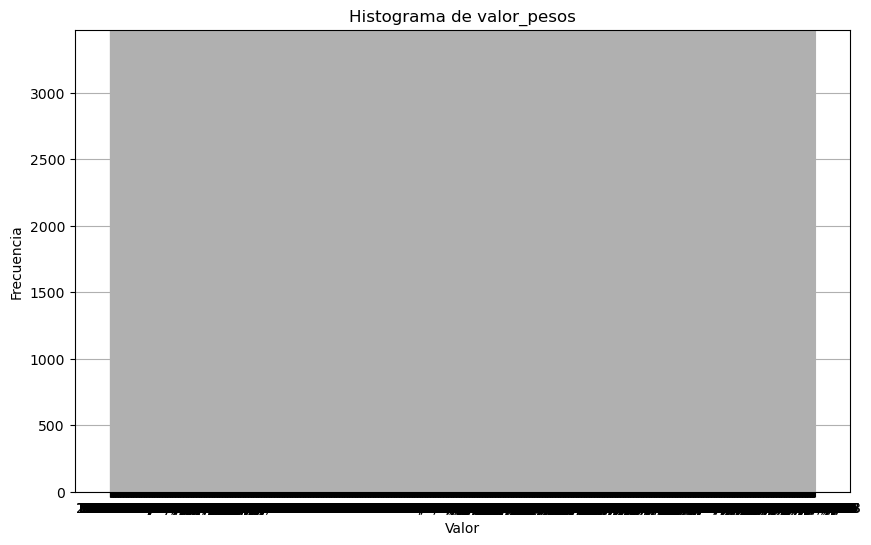

In [ ]:
# Crear un histograma para una columna específica (reemplaza con un nombre real)
plt.figure(figsize=(10, 6))
df1=df[df['agf'] == "SECURITY"]
df1['valor_pesos'].hist(bins=20)
plt.title('Histograma de valor_pesos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Crear un gráfico de dispersión entre dos columnas (reemplaza con nombres reales)
plt.figure(figsize=(10, 6))
plt.scatter(df['flujo'], df['dolar'])
plt.title('Gráfico de Dispersión entre columna1 y columna2')
plt.xlabel('columna1')
plt.ylabel('columna2')
plt.show()

In [ ]:
# Correlación entre las columnas
print("\nCorrelación entre columnas:")
print(df.corr())

### Notas

* Estos son paquetes y bibliotecas de terceros (no incluidos en la Biblioteca Estándar de Python) que necesitan ser instalados por separado.
* La forma en que instalas un paquete depende del gestor de paquetes que estés utilizando.
* Hay dos formas principales de hacerlo:
    1. *Pip* - Si usas `pip` para la gestión de paquetes (Google Colab usa esto).
    2. *Conda* - Si usas `conda` o `mamba` para la gestión de paquetes (usaremos esto en el Capítulo Avanzado).

**NOTA: Profundizaremos más en la gestión de paquetes en el capítulo avanzado.**

### Bibliotecas Comunes de Terceros

A continuación se muestran algunas bibliotecas comunes de terceros utilizadas en ciencia de datos:
- **Pandas**: Ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.
- **NumPy**: Soporta arrays y matrices grandes y multidimensionales, junto con una colección de funciones matemáticas de alto nivel.
- **Matplotlib**: Una biblioteca de gráficos para crear visualizaciones estáticas, animadas e interactivas en Python.
- **Seaborn**: Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.
- **SciPy**: Se utiliza para computación científica y técnica, ofreciendo módulos para optimización, álgebra lineal y más.
- **Scikit-learn**: Implementa una variedad de algoritmos de aprendizaje automático para tareas de minería de datos, análisis de datos y aprendizaje automático.
- **Plotly**: Crea gráficos interactivos y visualmente atractivos para la publicación en la web.

### ¿Dónde encuentro paquetes?

[PyPi](https://pypi.org/) - para `pip`  
[Anaconda](https://www.anaconda.com/) - para `conda`


### Listando Paquetes Instalados

Si estás ejecutando esto en Google Colab, usa lo siguiente:

In [ ]:
!pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
altgraph                      0.17.4
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
arxiv                         2.1.0
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-lru                     2.0.4
async-timeout                 4.0.2
atomicwri

Si estás ejecutando esto localmente usando Conda, ejecuta esto:

In [ ]:
!conda list

# packages in environment at C:\Users\jbecerra\AppData\Local\anaconda3:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2023.09             py311_mkl_1  
abseil-cpp                20211102.0           hd77b12b_0  
aiobotocore               2.5.0           py311haa95532_0  
aiofiles                  22.1.0          py311haa95532_0  
aiohttp                   3.8.5           py311h2bbff1b_0  
aioitertools              0.7.1              pyhd3eb1b0_0  
aiosignal                 1.2.0              pyhd3eb1b0_0  
aiosqlite                 0.18.0          py311haa95532_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
altgraph                  0.17.4                   pypi_0    pypi
anaconda-anon-usage       0.4.2           py311hfc23b7f_0  
anaconda-catalogs         0.2.0           py311haa95532_0  
anaconda-client           1.12.1          py311haa95532_0  
anaconda-cloud-auth       0.1.3           py311haa95532_0  
anaconda-navi

Nota: `!pip list` funcionará si estás usando conda; PERO no incluirá todos tus paquetes.

### Instalación de Paquetes

#### Notas

- Una vez más, dependiendo de tu gestor de paquetes, dependerá si necesitas usar pip o conda para instalar.

#### Ejemplos

##### Instalación con `pip` (ejemplo de Google Colab)

Google Colab viene de serie con un montón de bibliotecas instaladas; pero aquí hay una que no tenemos:

##### Instalación con `pip` (ejemplo de Visual Studio Code)

Para instalar un paquete en Visual Studio Code usando pip, abre una terminal y ejecuta lo siguiente:


In [ ]:
!pip install pyjokes

##### Instalación con `conda` (Ejemplo Local)

**Nota: Este es un ejemplo SOLO si estás ejecutando localmente y tienes Anaconda instalado (en Colab, pandas ya está instalado).**

Dado que `pandas` es una biblioteca fuera de la biblioteca estándar de Python, podemos instalarla con conda.


In [ ]:
!pip install pandas

## Importar el Paquete

Ahora que hemos instalado una biblioteca, necesitamos importarla. Esto nos permite usarla en nuestro cuaderno específico / entorno (profundizaremos más en los entornos más adelante en la sección avanzada).

Mostraremos cómo importar bibliotecas, paquetes y módulos de Python. Aquí tienes un recordatorio de la diferencia entre los tres:
1. **Biblioteca**: Una colección de paquetes y módulos.
2. **Paquete**: Un directorio con scripts de Python y un archivo `__init__.py`.
3. **Módulo**: Un archivo de script de Python que puede ser importado.

### Ejemplos

In [ ]:
import pyjokes

pyjokes.get_joke()